# Movie Lens

-**[とりあえず探索](#とりあえず探索)**
<br><br>
-**[ベイズ統計](#ベイズ統計)**  
    -[一番ratingされてる数が多い映画についてひとまずratingの事後分布を求める](#一番ratingされてる数が多い映画についてひとまずratingの事後分布を求める)  
    -[ID=590の映画 (50000人くらいからrated) は？](#ID=590の映画 (50000人くらいからrated) は？)  
    -[１回しかrateされていないものは？](#１回しかrateされていないものは？)  
    -[Sort](#Sort)  
    -[95%信用区間の下限でソートした結果が以下](#95%信用区間の下限でソートした結果が以下)
<br><br>
-**[user analysis](#user analysis)**  
    -[まずは年ごとのrateされた総回数をみてみる](#まずは年ごとのrateされた総回数をみてみる)  
    -[tagの総回数も確認](#tagの総回数も確認)  
    -[それぞれの映画がrateされた回数も確認](#それぞれの映画がrateされた回数も確認)
<br><br>
-**[Classification](#Classification)**  
    -[](#)

In [16]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ls

In [ ]:
cd ..

In [3]:
genome_score = pd.read_csv('genome-scores.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
genome_tags = pd.read_csv('genome-tags.csv')
movies = pd.read_csv("movies.csv")
tags = pd.read_csv('tags.csv')

## とりあえず探索

In [147]:
genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02475
1,1,2,0.02475
2,1,3,0.04900
3,1,4,0.07750
4,1,5,0.12450


In [56]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [45]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [57]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [47]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [58]:
tags.head()

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841


In [ ]:
cd ..

In [ ]:
IMDB = pd.read_csv('IMDB-Movie-Data.csv')

In [ ]:
IMDB.head()

In [64]:
ratings['time_year'] = ratings.timestamp/(60*60*24*365) + 1970

In [90]:
tags['time_year'] = tags.timestamp/(60*60*24*365) + 1970

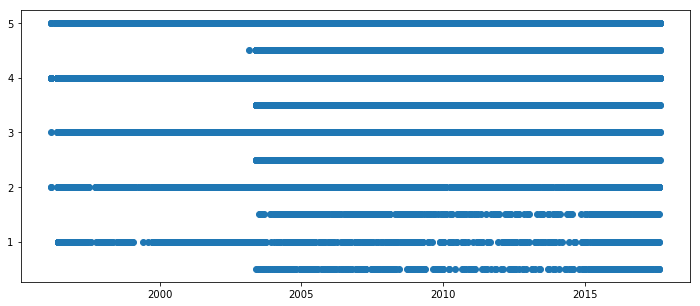

In [128]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline

figsize(12,5)

n = 356

plt.scatter(ratings[ratings.movieId==n].time_year, ratings[ratings.movieId==n].rating) 

In [67]:
ratings.groupby(['movieId'])['rating'].mean().sort_values(ascending=False)

movieId
137078    5.0
134387    5.0
170683    5.0
170633    5.0
132900    5.0
132912    5.0
133013    5.0
133017    5.0
170429    5.0
133970    5.0
134633    5.0
131777    5.0
170229    5.0
134757    5.0
170070    5.0
135055    5.0
135232    5.0
169866    5.0
169852    5.0
169820    5.0
132124    5.0
131359    5.0
171293    5.0
171207    5.0
171281    5.0
171279    5.0
171231    5.0
129036    5.0
129076    5.0
171221    5.0
         ... 
153774    0.5
148178    0.5
98080     0.5
124625    0.5
122647    0.5
154556    0.5
174947    0.5
172957    0.5
162262    0.5
135703    0.5
131152    0.5
154323    0.5
106434    0.5
135691    0.5
115607    0.5
124400    0.5
174915    0.5
161530    0.5
152900    0.5
166508    0.5
154911    0.5
154919    0.5
174883    0.5
174881    0.5
149664    0.5
134395    0.5
100103    0.5
103923    0.5
87962     0.5
133735    0.5
Name: rating, Length: 45115, dtype: float64

このように単純に平均を取ると評価数の少ないものは一つ一つの影響力が高くなってしまう

In [63]:
ratings.groupby(['userId']).size().sort_values(ascending=False)

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
243443     6320
98415      6094
229879     6024
98787      5814
172224     5701
230417     5619
70648      5356
194690     5206
107720     5169
24025      4946
165352     4921
243331     4834
101276     4834
74275      4815
41190      4785
245739     4707
65469      4508
141589     4459
89258      4444
210792     4426
59449      4414
166928     4351
208131     4271
59554      4236
258253     4227
          ...  
71221         1
209903        1
118074        1
6802          1
147242        1
237896        1
96141         1
96139         1
235811        1
223955        1
71369         1
17919         1
192346        1
42772         1
124779        1
124776        1
156627        1
107997        1
124768        1
209983        1
55270         1
112957        1
55277         1
103466        1
86509         1
118055        1
55299         1
227391        1
251476        1
236674        1
Length: 270896, d

In [176]:
ratings.groupby(['movieId']).count()

,userId,rating,timestamp,time_year
movieId,,,,
1,66008,66008,66008,66008
2,26060,26060,26060,26060
3,15497,15497,15497,15497
4,2981,2981,2981,2981
5,15258,15258,15258,15258
6,27895,27895,27895,27895
7,15157,15157,15157,15157
8,1521,1521,1521,1521
9,4423,4423,4423,4423


In [174]:
ratings.groupby(['movieId']).count().sort_values(by='userId', ascending=False)

,userId,rating,timestamp,time_year
movieId,,,,
356,91921,91921,91921,91921
318,91082,91082,91082,91082
296,87901,87901,87901,87901
593,84078,84078,84078,84078
2571,77960,77960,77960,77960
260,77045,77045,77045,77045
480,74355,74355,74355,74355
527,67662,67662,67662,67662
110,66512,66512,66512,66512


***

## ベイズ統計
単純にratingを平均したものを映画の評価として用いるのは適切ではない。ベイズ統計の手法を用いて、各映画のratingを確率分布として求める。

### 一番ratingされてる数が多い映画についてひとまずratingの事後分布を求める

ID=356 (90000人ほどからrated) の映画について、それぞれのratingの数はいくらか？

In [4]:
movies[movies.movieId==356]

,movieId,title,genres
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [165]:
n = 356
ratings[ratings.movieId==n].rating.value_counts().sort_index()
scheme = pd.DataFrame(data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ratings[ratings.movieId==n].rating.value_counts().sort_index() + scheme.T

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,453,1361,449,2873,1631,12181,6338,26518,9837,30280


In [166]:
observations = []
observations = ratings[ratings.movieId==n].rating.value_counts().sort_index() + scheme.T
observations = np.array(observations)

In [9]:
print(type(scheme))
print(type(observations))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [10]:
observations[0]

array([  453,  1361,   449,  2873,  1631, 12181,  6338, 26518,  9837, 30280])

それぞれのratingをつける人数の事後分布を求めたい。観測されるデータは多項分布に従う。多項分布の共役事前分布はディリクレ分布なので、事前分布は、$dirichlet(1, 1, ... ,1)$、事後分布は、$dirichlet(1+N_1, 1+N_2, ... ,1+N_m)$となる。

In [167]:
from numpy.random import dirichlet
prior_parameters = np.array([1,1,1,1,1,1,1,1,1,1])
posterior_samples = dirichlet(prior_parameters + np.nan_to_num(observations[0]), size=100000)

print("The random samples from the posterior:")
print(posterior_samples[0])
print(posterior_samples[1])

The random samples from the posterior:
[ 0.00505562  0.01496118  0.00513506  0.03085583  0.017427    0.13182598
  0.06849461  0.2872098   0.10726004  0.33177488]
[ 0.00441208  0.01474049  0.00504852  0.03185249  0.01830366  0.13047331
  0.06840031  0.28817878  0.10825873  0.33033162]


事後分布から生成されるexpected ratingを求める。

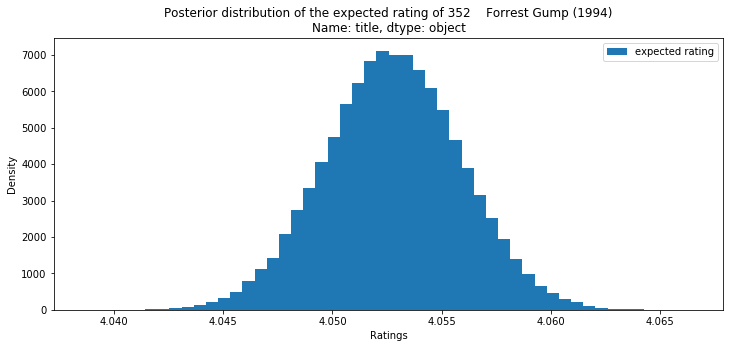

In [168]:
def expected_rating(P):
    return 0.5*P[:, 0] + 1.0*P[:, 1] + 1.5*P[:, 2] + 2.0*P[:, 3] + 2.5*P[:, 4] + 3.0*P[:, 5] + 3.5*P[:, 6] + 4.0*P[:, 7] + 4.5*P[:, 8] + 5.0*P[:, 9]

posterior_expected_rating = expected_rating(posterior_samples)
plt.hist(posterior_expected_rating, histtype='stepfilled', bins=50, label='expected rating')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Posterior distribution of the expected rating of %s' %movies[movies.movieId==n].title)
plt.legend()
plt.savefig('posterior_distribution_of_%s.png' %movies[movies.movieId==n].title)

### ID=590の映画 (50000人くらいからrated) は？

In [22]:
movies[movies.movieId==590].title

584    Dances with Wolves (1990)
Name: title, dtype: object

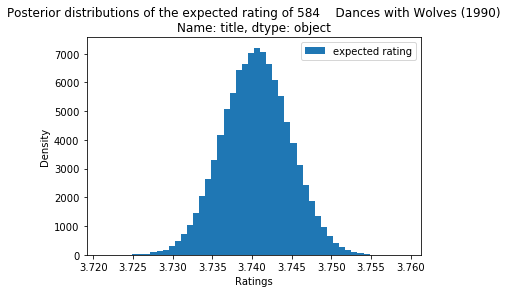

In [23]:
n = 590
observations = np.array(ratings[ratings.movieId==n].rating.value_counts().sort_index()+scheme.T)
prior_parameters = np.array([1,1,1,1,1,1,1,1,1,1])
posterior_samples = dirichlet(prior_parameters + np.nan_to_num(observations[0]), size=100000)

posterior_expected_rating = expected_rating(posterior_samples)
plt.hist(posterior_expected_rating, histtype='stepfilled', bins=50, label='expected rating')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Posterior distribution of the expected rating of %s' %movies[movies.movieId==n].title)
plt.legend()
plt.savefig('posterior_distribution_of_%s.png' %movies[movies.movieId==n].title)

### １回しかrateされていないものは？

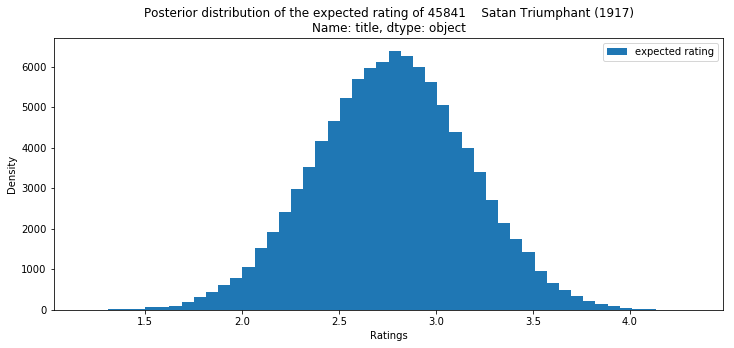

In [169]:
n = 176275
scheme = pd.DataFrame(data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
observations = np.array(ratings[ratings.movieId==n].rating.value_counts().sort_index()+scheme.T)
prior_parameters = np.array([1,1,1,1,1,1,1,1,1,1])
posterior_samples = dirichlet(prior_parameters + np.nan_to_num(observations[0]), size=100000)

posterior_expected_rating = expected_rating(posterior_samples)
plt.hist(posterior_expected_rating, histtype='stepfilled', bins=50, label='expected rating')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Posterior distribution of the expected rating of %s' %movies[movies.movieId==n].title)
plt.legend()
plt.savefig('posterior_distribution_of_%s.png' %movies[movies.movieId==n].title)

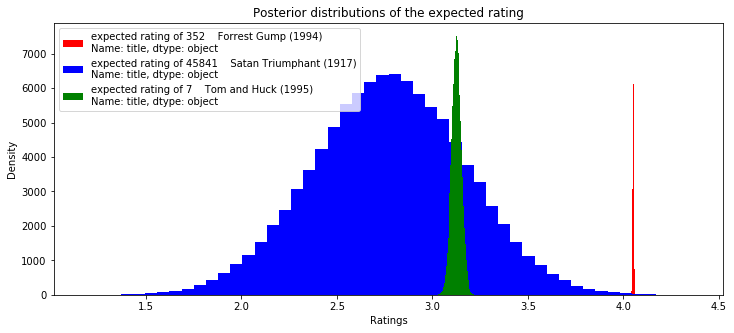

In [175]:
n = 356
m = 176275
l = 8
scheme = pd.DataFrame(data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
observations = np.array(ratings[ratings.movieId==n].rating.value_counts().sort_index()+scheme.T)
observations_m = np.array(ratings[ratings.movieId==m].rating.value_counts().sort_index()+scheme.T)
observations_l = np.array(ratings[ratings.movieId==l].rating.value_counts().sort_index()+scheme.T)

prior_parameters = np.array([1,1,1,1,1,1,1,1,1,1])
posterior_samples = dirichlet(prior_parameters + np.nan_to_num(observations[0]), size=100000)
posterior_samples_m = dirichlet(prior_parameters + np.nan_to_num(observations_m[0]), size=100000)
posterior_samples_l = dirichlet(prior_parameters + np.nan_to_num(observations_l[0]), size=100000)

posterior_expected_rating = expected_rating(posterior_samples)
posterior_expected_rating_m = expected_rating(posterior_samples_m)
posterior_expected_rating_l = expected_rating(posterior_samples_l)

plt.hist(posterior_expected_rating, histtype='stepfilled', bins=50, color='r', label='expected rating of %s' %movies[movies.movieId==n].title)
plt.hist(posterior_expected_rating_m, histtype='stepfilled', bins=50, color='b', label='expected rating of %s' %movies[movies.movieId==m].title)
plt.hist(posterior_expected_rating_l, histtype='stepfilled', bins=50, color='g', label='expected rating of %s' %movies[movies.movieId==l].title)

plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Posterior distributions of the expected rating')
plt.legend()
plt.savefig('posterior_distributions_exapmle.png' )

各映画に対して、それぞれのratingをつけた人数

In [25]:
obs_all = ratings.groupby(['movieId']).rating.value_counts().sort_index()
obs_all

movieId  rating
1        0.5         441
         1.0         804
         1.5         438
         2.0        2083
         2.5        1584
         3.0       11577
         3.5        5741
         4.0       22020
         4.5        5325
         5.0       15995
2        0.5         263
         1.0         797
         1.5         525
         2.0        2479
         2.5        1810
         3.0        8510
         3.5        2916
         4.0        6035
         4.5         690
         5.0        2035
3        0.5         169
         1.0         772
         1.5         233
         2.0        1665
         2.5         616
         3.0        6213
         3.5         759
         4.0        3433
         4.5         154
         5.0        1483
                   ...  
176219   0.5           1
         2.0           1
         2.5           1
         3.0           2
         4.0           1
         5.0           1
176221   2.5           1
176223   4.0           1
176225   

### Sort
95%信用下限をもとにソートする  
※かなり時間がかかる

In [139]:
N = 10000 # sample size
lower_limits = []
scheme = pd.DataFrame(data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

for n in np.array(ratings.movieId.drop_duplicates()):
    observations = np.array(ratings[ratings.movieId==n].rating.value_counts().sort_index()+scheme.T)
    prior_parameters = np.array([1,1,1,1,1,1,1,1,1,1])
    posterior_samples = dirichlet(prior_parameters + np.nan_to_num(observations[0]), size=N)
    posterior_expected_rating = expected_rating(posterior_samples)
    v = np.sort(posterior_expected_rating)[int(0.05*N)]
    lower_limits.append(n)
    lower_limits.append(v)

In [141]:
lower_limits

[110,
 4.0097268926734548,
 147,
 3.5724865712680094,
 858,
 4.3334041599778246,
 1221,
 4.2556116609537762,
 1246,
 3.9036532957067518,
 1968,
 3.8180996051327591,
 2762,
 4.0147276569366364,
 2918,
 3.9180294173591541,
 2959,
 4.2245860314846819,
 4226,
 4.1502152894310385,
 4878,
 3.9629657202680524,
 5577,
 3.5209933357531842,
 33794,
 3.93642025912101,
 54503,
 3.7145319842499367,
 58559,
 4.174354058561252,
 59315,
 3.8452399051885484,
 68358,
 3.8591169655088251,
 69844,
 3.82721484488254,
 73017,
 3.7525845654316763,
 81834,
 3.8567602025072247,
 91500,
 3.5459938566277756,
 91542,
 3.7199694248640092,
 92439,
 3.266262566717911,
 96821,
 3.8469564557940679,
 98809,
 3.6853204253344893,
 99114,
 3.9965859561074497,
 112552,
 4.1024273975260748,
 5,
 3.0660520482258282,
 25,
 3.6560351731953551,
 32,
 3.8823746417677247,
 58,
 3.9497796820181637,
 64,
 2.8024322968608826,
 79,
 3.1404171032031751,
 141,
 3.5123340254445039,
 260,
 4.126295324141088,
 339,
 3.4993494629813942,
 3

In [33]:
lower_limits[0::2]

[110,
 147,
 858,
 1221,
 1246,
 1968,
 2762,
 2918,
 2959,
 4226,
 4878,
 5577,
 33794,
 54503,
 58559,
 59315,
 68358,
 69844,
 73017,
 81834,
 91500,
 91542,
 92439,
 96821,
 98809,
 99114,
 112552,
 5,
 25,
 32,
 58,
 64,
 79,
 141,
 260,
 339,
 377,
 605,
 628,
 648,
 762,
 780,
 786,
 788,
 1210,
 1233,
 1356,
 1475,
 1552,
 480,
 500,
 527,
 1092,
 1097,
 1270,
 3101,
 4474,
 223,
 415,
 1197,
 1422,
 1431,
 1597,
 1617,
 1644,
 1645,
 1732,
 1909,
 1911,
 2023,
 2338,
 2355,
 2396,
 2443,
 2541,
 2581,
 2683,
 2692,
 2694,
 2706,
 2710,
 2712,
 2716,
 2763,
 2805,
 2875,
 2881,
 2987,
 3004,
 3005,
 3114,
 3160,
 3203,
 3285,
 3298,
 3408,
 3409,
 3476,
 3578,
 3623,
 3751,
 3752,
 3753,
 3798,
 3908,
 3909,
 3977,
 4014,
 4084,
 4238,
 4848,
 4896,
 5679,
 7,
 157,
 296,
 541,
 750,
 908,
 1193,
 1198,
 1201,
 1204,
 1225,
 1230,
 1254,
 1263,
 1302,
 1945,
 2163,
 2707,
 2877,
 3079,
 3156,
 3198,
 3255,
 11,
 2565,
 2628,
 293,
 318,
 2571,
 2858,
 3535,
 3948,
 4022,
 4306,

In [34]:
lower_limits[1::2]

[4.0097795330547283,
 3.5727285611826796,
 4.3333254404437085,
 4.2556913078888581,
 3.9034155369476227,
 3.818461988115466,
 4.0150545636606276,
 3.9180751044527593,
 4.2246801398488625,
 4.1502444598325088,
 3.9626977076749323,
 3.5210533130152455,
 3.9363593043932799,
 3.7144621569307126,
 4.1746279282860268,
 3.8452093020897862,
 3.8594607756783903,
 3.8271138922191597,
 3.7526976530305252,
 3.8571513198985734,
 3.5458164584341674,
 3.7196895244829746,
 3.2661956506159662,
 3.8465070742313667,
 3.6857286833148475,
 3.9963531000627306,
 4.1019961600860677,
 3.0661733952411381,
 3.656091462657904,
 3.8824844373757457,
 3.9497460117648555,
 2.8011491757455507,
 3.1410774643404933,
 3.5126503395952655,
 4.1264531789990073,
 3.4990956513210403,
 3.4800030404513316,
 3.2821098406569691,
 3.7391999974212187,
 3.393088954262701,
 2.4008858591401787,
 3.3898244652445317,
 3.1609081651176303,
 2.8496831685951429,
 3.9830317832515925,
 4.0929910800868807,
 3.6543303516370376,
 3.0565141694758

In [140]:
least_plausible_values = pd.DataFrame(data=[lower_limits[0::2], lower_limits[1::2]], index=['movieId', '95%_least_plausible']).T

### 95%信用区間の下限でソートした結果が以下

In [142]:
least_plausible_values_sorted = least_plausible_values.sort_values(by='95%_least_plausible', ascending=False)
least_plausible_values_sorted

,movieId,95%_least_plausible
140,318.0,4.424716
8226,159817.0,4.409009
2,858.0,4.333404
538,50.0,4.294587
4633,170705.0,4.261164
51,527.0,4.260873
3,1221.0,4.255612
219,2019.0,4.241916
8,2959.0,4.224586
588,904.0,4.222812


csv fileとして保存

In [144]:
pd.merge(least_plausible_values_sorted, movies, on='movieId').to_csv('95%_least_plausible.csv')

In [143]:
pd.merge(least_plausible_values_sorted, movies, on='movieId').head(50)

,movieId,95%_least_plausible,title,genres
0,318,4.424716,"Shawshank Redemption, The (1994)",Crime|Drama
1,159817,4.409009,Planet Earth (2006),Documentary
2,858,4.333404,"Godfather, The (1972)",Crime|Drama
3,50,4.294587,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
4,170705,4.261164,Band of Brothers (2001),Action|Drama|War
5,527,4.260873,Schindler's List (1993),Drama|War
6,1221,4.255612,"Godfather: Part II, The (1974)",Crime|Drama
7,2019,4.241916,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama
8,2959,4.224586,Fight Club (1999),Action|Crime|Drama|Thriller
9,904,4.222812,Rear Window (1954),Mystery|Thriller


In [ ]:
len(obs_all.value_counts('movieId'))

それぞれの映画に対して、事後分布を求めるのは時間がかかりすぎる。  
95%信用下限を近似的に求める式は以下。

$$ \frac{a}{a + b} - 1.65\sqrt{ \frac{ab}{ (a+b)^2(a + b +1 ) } }$$

where 

\begin{align}
& a = 1 + S \\\\
& b = 1 + N - S \\\\
\end{align}

where $N$ is the number of users who rated, and $S$ is the sum of all the ratings, under the equivalence scheme mentioned above. 

In [50]:
def intervals(N, S):
    a = 1. + S
    b = 1. + N - S
    mu = a / (a + b)
    std_err = 1.65 * np.sqrt((a * b) / ((a + b) ** 2 * (a + b + 1.)))
    return (mu, std_err)

In [158]:
ratings.pivot(index='movieId', columns='rating')

ValueError: Index contains duplicate entries, cannot reshape

***

## user analysis

### まずは年ごとのrateされた総回数をみてみる

In [70]:
ratings.groupby('userId').count().sort_values(by='movieId', ascending=False)

,movieId,rating,timestamp,time_year
userId,,,,
45811,18276,18276,18276,18276
8659,9279,9279,9279,9279
270123,7638,7638,7638,7638
179792,7515,7515,7515,7515
228291,7410,7410,7410,7410
243443,6320,6320,6320,6320
98415,6094,6094,6094,6094
229879,6024,6024,6024,6024
98787,5814,5814,5814,5814


In [104]:
year_bins = range(1995, 2019)
cut = pd.cut(ratings.time_year, year_bins)
num_per_year = pd.value_counts(cut)

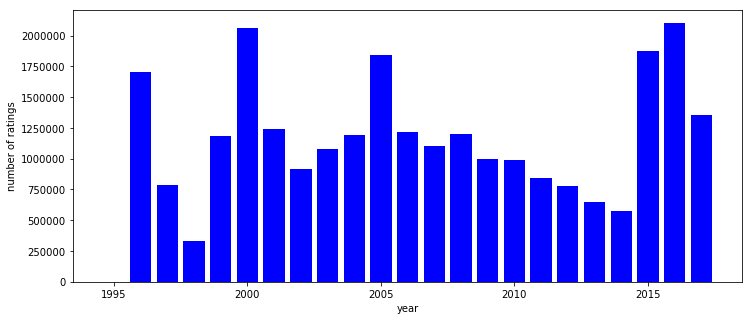

In [122]:
plt.bar(range(1995, 2018), num_per_year.sort_index(), color='b')
plt.xlabel('year')
plt.ylabel('number of ratings')

なんでこんな分布に？

### tagの総回数も確認

In [91]:
tags.groupby('userId').count().sort_values(by='movieId', ascending=False)

,movieId,tag,timestamp,time_year
userId,,,,
150781,21452,21452,21452,21452
257255,14400,14400,14400,14400
204457,11040,11040,11040,11040
178616,10664,10664,10664,10664
238064,9949,9949,9949,9949
76206,8107,8107,8107,8107
78340,7285,7285,7285,7285
22815,6703,6703,6703,6703
168335,6454,6454,6454,6454


In [92]:
tags.time_year.min()

2006.0042240613902

In [94]:
tags.time_year.max()

2017.6225666222729

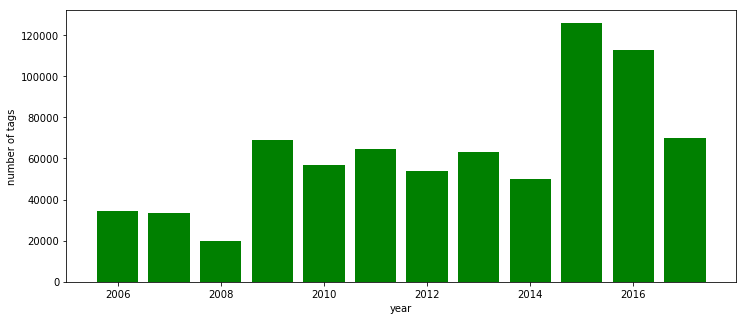

In [124]:
year_bins = range(2006, 2019)
cut = pd.cut(tags.time_year, year_bins)
num_per_year_tags = pd.value_counts(cut)

plt.bar(range(2006, 2018), num_per_year_tags.sort_index(), color='g')
plt.xlabel('year')
plt.ylabel('number of tags')

In [118]:
np.array(range(2006, 2018))+0.8

array([ 2006.8,  2007.8,  2008.8,  2009.8,  2010.8,  2011.8,  2012.8,
        2013.8,  2014.8,  2015.8,  2016.8,  2017.8])

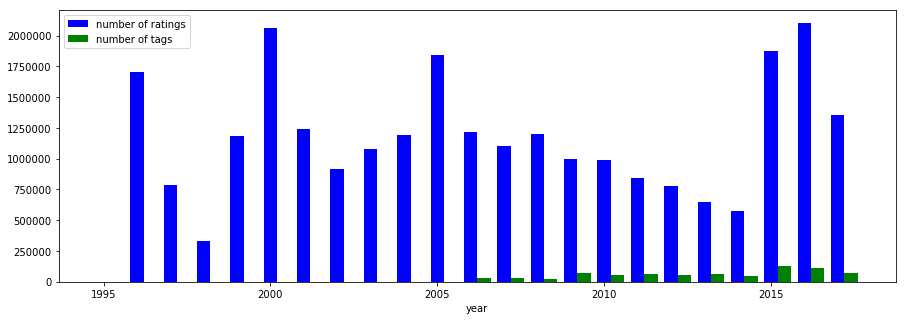

In [126]:
w=0.4
plt.figure(figsize=(15, 5), facecolor="white")
plt.bar(range(1995, 2018), num_per_year.sort_index(), color='b', width=w, label='number of ratings', align='center')
plt.bar(np.array(range(2006, 2018))+w, num_per_year_tags.sort_index(), color='g', width=w, label='number of tags', align='center')
plt.xlabel('year')
plt.legend(loc="best")

tagsとratingsの2005年以降の大まかな傾向は一致

### それぞれの映画がrateされた回数も確認

In [132]:
n = 356

year_bins = range(1995, 2019)
cut = pd.cut(ratings[ratings.movieId==n].time_year, year_bins)
num_per_year_n = pd.value_counts(cut).sort_index()

In [133]:
num_per_year_n

(1995, 1996]        0
(1996, 1997]    19024
(1997, 1998]     2216
(1998, 1999]     1268
(1999, 2000]     3664
(2000, 2001]     5362
(2001, 2002]     3792
(2002, 2003]     2506
(2003, 2004]     2222
(2004, 2005]     2868
(2005, 2006]     4450
(2006, 2007]     3185
(2007, 2008]     3425
(2008, 2009]     3861
(2009, 2010]     2713
(2010, 2011]     2628
(2011, 2012]     2181
(2012, 2013]     1998
(2013, 2014]     1780
(2014, 2015]     1544
(2015, 2016]     9555
(2016, 2017]     7259
(2017, 2018]     4420
Name: time_year, dtype: int64

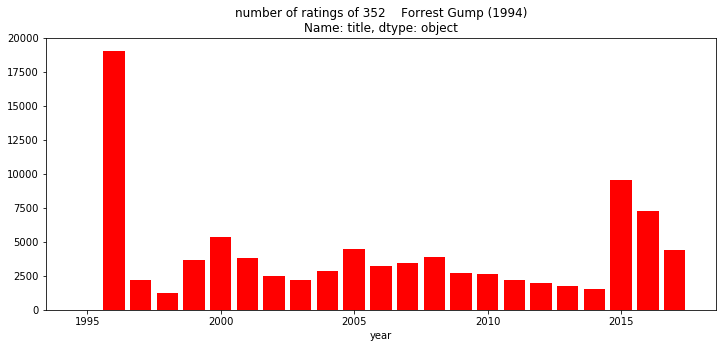

In [135]:
plt.bar(range(1995, 2018), num_per_year_n, color='r')
plt.xlabel('year')
plt.title('number of ratings of %s' %movies[movies.movieId==n].title)

こちらも大まかな傾向は全体のrating総数と一致。  
つまり、各映画のrating総数もwebサイトを訪れた人数とかに影響しそうなので、マクロに時系列変化を追ってもあまり意味がなさそう。

***

## Classification


In [149]:
genome_score.groupby('movieId').head(20)

,movieId,tagId,relevance
0,1,1,0.02475
1,1,2,0.02475
2,1,3,0.04900
3,1,4,0.07750
4,1,5,0.12450
5,1,6,0.23875
6,1,7,0.06575
7,1,8,0.28575
8,1,9,0.25400
9,1,10,0.02625


In [150]:
print(genome_score.tagId.max())
print(genome_score.movieId.max())

1128
174585


In [156]:
genome_score.pivot(index='movieId', columns='tagId')

relevance                                                        \
tagId        1        2        3        4        5        6        7      
movieId                                                                   
1         0.02475  0.02475  0.04900  0.07750  0.12450  0.23875  0.06575   
2         0.03750  0.04100  0.03675  0.04750  0.10000  0.05950  0.05125   
3         0.03800  0.04825  0.02650  0.07300  0.05475  0.06025  0.05750   
4         0.03125  0.03400  0.03375  0.02875  0.06175  0.03125  0.02250   
5         0.04100  0.05125  0.05550  0.03300  0.07475  0.11100  0.02900   
6         0.02600  0.02275  0.01975  0.05275  0.08525  0.05200  0.03775   
7         0.04250  0.04750  0.15350  0.07150  0.10650  0.15225  0.05100   
8         0.02750  0.03250  0.04250  0.02275  0.05450  0.03050  0.01700   
9         0.03175  0.03600  0.01750  0.01650  0.03300  0.01500  0.01350   
10        0.99975  0.99975  0.01900  0.03400  0.06050  0.04100  0.04575   
11        0.03700  0.04250  0.24950  0.06250  0.10625  0.06675  0.03150   
12        0.03600  0.03350  0.03100  0.04600  0.29825  0.02500  0.01700   
13        0.02875  0.03225  0.03900  0.04225  0.04300  0.03425  0.01175   
14        0.02250  0.02300  0.05175  0.15525  0.14275  0.11175  0.30500   
15        0.03775  0.04200  0.37875  0.02875  0.07725  0.04600  0.02125   
16        0.02900  0.02775  0.02600  0.15400  0.16350  0.08425  0.10300   
17        0.02050  0.02200  0.98125  0.17425  0.22900  0.11100  0.09825   
18        0.03550  0.03375  0.02750  0.05850  0.05950  0.02300  0.02550   
19        0.03575  0.03975  0.02075  0.04550  0.06400  0.06275  0.01525   
20        0.04450  0.05325  0.01775  0.02350  0.06350  0.02125  0.01825   
21        0.03100  0.03375  0.02475  0.05750  0.17875  0.10825  0.04050   
22        0.02250  0.02550  0.02950  0.02875  0.16950  0.04100  0.03100   
23        0.07850  0.08300  0.01425  0.02350  0.04250  0.01125  0.01700   
24        0.02950  0.03050  0.02025  0.02375  0.05775  0.06150  0.03950   
25        0.02250  0.02125  0.02050  0.04700  0.05975  0.08475  0.01650   
26        0.02075  0.02625  0.28950  0.18600  0.28025  0.05475  0.03800   
27        0.02625  0.02825  0.02775  0.02125  0.06200  0.09950  0.20525   
28        0.02175  0.02375  0.73350  0.21350  0.20775  0.06950  0.04950   
29        0.02250  0.02375  0.13550  0.25225  0.14225  0.07850  0.03850   
30        0.02625  0.03275  0.11250  0.23850  0.80025  0.10325  0.05425   
...           ...      ...      ...      ...      ...      ...      ...   
168418    0.01750  0.01600  0.02925  0.07000  0.07650  0.07675  0.02925   
168420    0.03125  0.04550  0.07050  0.06850  0.21225  0.01300  0.02375   
168498    0.04225  0.03350  0.03250  0.03500  0.04425  0.01825  0.01825   
168554    0.04400  0.03775  0.03925  0.02650  0.17500  0.06100  0.07850   
168612    0.02425  0.02300  0.05625  0.09225  0.12875  0.07725  0.03725   
168712    0.04200  0.03500  0.04600  0.02550  0.06350  0.02500  0.02275   
169670    0.04250  0.03850  0.01475  0.03925  0.07725  0.01625  0.00975   
169864    0.05700  0.04775  0.02600  0.02600  0.07750  0.09975  0.01375   
169900    0.01975  0.01725  0.03950  0.08050  0.17425  0.02825  0.06750   
169906    0.03175  0.04875  0.02350  0.03750  0.07875  0.20125  0.06175   
169982    0.03325  0.02650  0.02700  0.04275  0.05350  0.03600  0.03250   
169984    0.03675  0.03000  0.03450  0.05325  0.08000  0.02450  0.01450   
169992    0.02875  0.02425  0.02150  0.05650  0.06050  0.02000  0.01600   
170357    0.03275  0.03075  0.03075  0.08850  0.21850  0.14900  0.17375   
170399    0.03300  0.04125  0.03050  0.02775  0.04350  0.02750  0.02150   
170629    0.02250  0.04850  0.03275  0.02975  0.06825  0.02625  0.01500   
170697    0.03250  0.01900  0.01575  0.04975  0.06175  0.15700  0.04525   
170729    0.05075  0.06175  0.08675  0.12225  0.09825  0.05450  0.03875   
170827    0.04275  0.04750  0.02025  0.09400  0.35850  0.03250  0.02625   
170875    0.08575  0.03575  0.016

In [159]:
x = genome_score.pivot(index='movieId', columns='tagId')

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [162]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.00442623 -0.00346839  0.01244742 ...,  0.01751607 -0.00834583
  -0.00125245]
 [ 0.01353938  0.00990759 -0.00316512 ...,  0.00514871  0.01385119
   0.00625477]
 [ 0.00144647  0.00210681  0.02359073 ...,  0.03196939 -0.03501373
  -0.01594058]]
[ 2.87349039  1.22332991  0.99506563]


TypeError: '(slice(None, None, None), 0)' is an invalid key

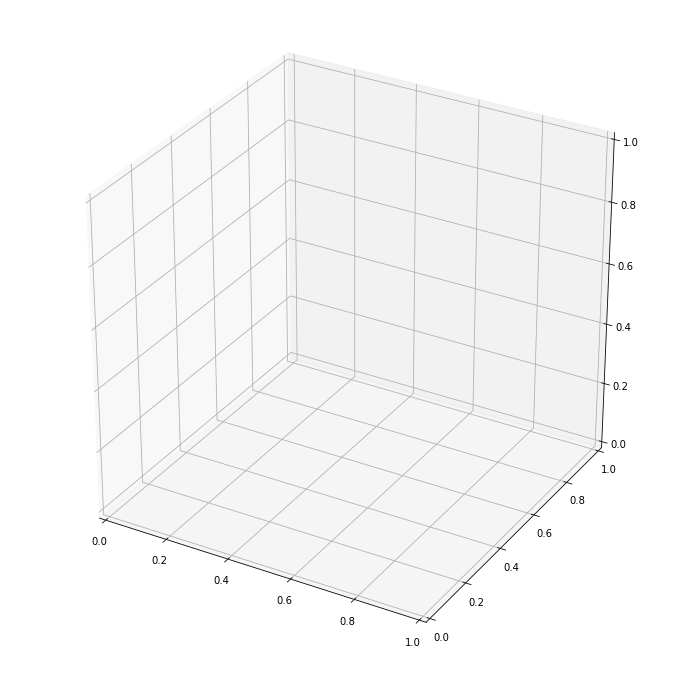

In [164]:
from mpl_toolkits.mplot3d import Axes3D

def draw_vector(v0, v1, v2, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, shrinkC=0)
    ax.annotate('',v2, v1, v0, arrowprops=arrowprops)

# plot data
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=x[:, 0], ys=x[:, 1], zs=x[:, 2], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

***

↓ゴミcell

In [ ]:
import numpy as np
import pandas as pd

movieID = np.array(ratings.movieId.drop_duplicates())
userID = np.array(ratings.userId.drop_duplicates())
data = []
for i in range(len(movieID)):
    data.
rating_df = pd.DataFrame(data=data, index=movieID, columns=userID)

#for i in movieID:
    

In [ ]:
X = np.zeros([movieID.max(), userID.max()])
for i, item in ratings.iterrows():
    X[item['userId']-1, item['movieId']-1] = item['rating']

In [ ]:
N = posteriors[0].shape[0]
lower_limits = []

for i in range(len(obs_all.value_counts('movieId')))):
    j = submissions[i]
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.9,
             histtype="step", color=colours[i], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )
    v = np.sort(posteriors[i])[int(0.05 * N)]
    # plt.vlines( v, 0, 15 , color = "k", alpha = 1, linewidths=3 )
    plt.vlines(v, 0, 10, color=colours[i], linestyles="--", linewidths=3)
    lower_limits.append(v)
    plt.legend(loc="upper left")

plt.legend(loc="upper left")
plt.title("Posterior distributions of upvote ratios on different submissions");
order = np.argsort(-np.array(lower_limits))
print(order, lower_limits)

In [26]:
movieID = np.array(ratings.movieId.drop_duplicates())
userID = np.array(ratings.userId.drop_duplicates())

In [ ]:
post_mean, post_std = intervals(ratings.movieId.value_counts(), )